In [2]:
# ERP_visual
#!pip install cartopy
import cartopy.crs as ccrs # import projections
import cartopy.feature as cf # import features
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import seaborn as sns


In [ ]:
# Read longitude and latitude data
nc_albroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
lon = nc_albroof.variables['lon'][:]
lat = nc_albroof.variables['lat'][:]

# Find index ranges corresponding to longitude and latitude
lon_mask = (lon >= -2.8) & (lon <= -1.8)
lat_mask = (lat >= 53.3) & (lat <= 53.75)

# Convert boolean masks to concrete position indices
lon_idx = np.where(lon_mask)[0]
lat_idx = np.where(lat_mask)[0]

# Assume albroof_subset is a 2D array, lon_indices and lat_indices are index arrays
lon_Man = lon[lon_idx]
lat_Man = lat[lat_idx]

# pcolormesh expects longitude and latitude as 2D grids; if they are 1D, expand with meshgrid
lon_grid, lat_grid = np.meshgrid(lon_Man, lat_Man)

### Read the data of the Manchester area.

In [ ]:
# Open NetCDF files one by one
# nc_albroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_emroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_albimproad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_IMPROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_emimproad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_IMPROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_albperroad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_PERROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_emperroad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_PERROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_albwall = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_WALL_1km_masked_gapfilled_QC.nc', mode='r')
nc_emwall = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_WALL_1km_masked_gapfilled_QC.nc', mode='r')
# nc_windhgtcanyon = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WIND_HGT_CANYON_1km_masked_gapfilled_QC.nc', mode='r')
nc_htroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_HT_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_canyonhwr = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_CANYON_HWR_1km_masked_gapfilled_QC.nc', mode='r')
nc_wtlunitroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WTLUNIT_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_wtroadperv = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WTROAD_PERV_1km_masked_gapfilled_QC.nc', mode='r')

# Read a specific variable for the area of interest
albroof_Man = nc_albroof.variables['ALB_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albroof.close()
print('1')

# Read EM_ROOF variable for the area of interest
emroof_Man = nc_emroof.variables['EM_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emroof.close()
print('2')

# Read ALB_IMPROAD variable for the area of interest
albimproad_Man = nc_albimproad.variables['ALB_IMPROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albimproad.close()
print('3')

# Read EM_IMPROAD variable for the area of interest
emimproad_Man = nc_emimproad.variables['EM_IMPROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emimproad.close()
print('4')

# Read ALB_PERROAD variable for the area of interest
albperroad_Man = nc_albperroad.variables['ALB_PERROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albperroad.close()
print('5')

# Read EM_PERROAD variable for the area of interest
emperroad_Man = nc_emperroad.variables['EM_PERROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emperroad.close()
print('6')

# Read ALB_WALL variable for the area of interest
albwall_Man  = nc_albwall.variables['ALB_WALL'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albwall.close()
print('7')

# Read EM_WALL variable for the area of interest
emwall_Man = nc_emwall.variables['EM_WALL'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emwall.close()
print('8')

# Read HT_ROOF variable for the area of interest
htroof_Man = nc_htroof.variables['HT_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_htroof.close()
print('9')

# Read CANYON_HWR variable for the area of interest
canyonhwr_Man = nc_canyonhwr.variables['CANYON_HWR'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_canyonhwr.close()
print('10')

# Read WTLUNIT_ROOF variable for the area of interest
wtlunitroof_Man = nc_wtlunitroof.variables['WTLUNIT_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_wtlunitroof.close()
print('11')

# Read WTROAD_PERV variable for the area of interest
wtroadperv_Man = nc_wtroadperv.variables['WTROAD_PERV'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_wtroadperv.close()
print('12')

# Close files

1
2
3
4
5
6
7
8
9
10
11
12


### Masking out the Manchester area from the shp file

In [ ]:
# Load Manchester shapefile
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from shapely.geometry import Point

shapefile_path = "D:/A_sem2/ERP/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp"
gdf = gpd.read_file(shapefile_path)
print(gdf.columns)

# Filter administrative areas for Greater Manchester, UK
g1 = gdf[(gdf['name'] == 'Manchester') & (gdf['iso_a2'] == 'GB')]
g2 = gdf[(gdf['name'] == 'Stockport') & (gdf['iso_a2'] == 'GB')]
g3 = gdf[(gdf['name'] == 'Wigan') & (gdf['iso_a2'] == 'GB')]
g4 = gdf[(gdf['name'] == 'Bolton') & (gdf['iso_a2'] == 'GB')]
g5 = gdf[(gdf['name'] == 'Salford') & (gdf['iso_a2'] == 'GB')]
g6 = gdf[(gdf['name'] == 'Trafford') & (gdf['iso_a2'] == 'GB')]
g7 = gdf[(gdf['name'] == 'Tameside') & (gdf['iso_a2'] == 'GB')]
g8 = gdf[(gdf['name'] == 'Oldham') & (gdf['iso_a2'] == 'GB')]
g9 = gdf[(gdf['name'] == 'Rochdale') & (gdf['iso_a2'] == 'GB')]
g10 = gdf[(gdf['name'] == 'Bury') & (gdf['iso_a2'] == 'GB')]

# Concatenate GeoDataFrames (axis=0 for row-wise)
gdf_combined = gpd.GeoDataFrame(pd.concat([g1, g2, g3, g4, g5, g6, g7, g8, g9, g10], axis=0), crs=gdf.crs)

# Merge polygons into a single large polygon (Polygon or MultiPolygon)
manchester_polygon = gdf_combined.unary_union

def mask_data_inside_polygon(lon_grid, lat_grid, data_array, polygon):
    """
    Filter a 2D gridded dataset to keep only points inside a polygon, set outside to np.nan.

    Parameters:
    - lon_grid: 2D numpy array of longitudes
    - lat_grid: 2D numpy array of latitudes
    - data_array: 2D numpy array of data matching the grids
    - polygon: shapely Polygon or MultiPolygon

    Returns:
    - filtered_data: 2D numpy array where values outside polygon are np.nan
    """
    # Flatten the 2D lon/lat grids and create shapely Points
    points = [Point(x, y) for x, y in zip(lon_grid.flatten(), lat_grid.flatten())]
    # Boolean mask for points inside the polygon
    mask = np.array([polygon.contains(pt) for pt in points])

    # Initialize an array filled with np.nan
    filtered_data = np.full(data_array.size, np.nan)

    # Keep data values where mask is True
    filtered_data[mask] = data_array.flatten()[mask]

    # Reshape back to original 2D shape
    filtered_data = filtered_data.reshape(data_array.shape)

    return filtered_data

# Example test (uncomment and ensure lon_grid, lat_grid and a variable like htroof_Man exist)
# filtered_data = mask_data_inside_polygon(lon_grid, lat_grid, htroof_Man, manchester_polygon)
# plt.figure(figsize=(8, 6))
# plt.pcolormesh(lon_grid, lat_grid, filtered_data, shading='auto', cmap='viridis')
# plt.colorbar()
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('htroof_Man')
# gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
# plt.show()

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22352\3644932700.py:25: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  manchester_polygon = gdf_combined.unary_union


In [ ]:
# Store the read variables sequentially into the `features` array
# First determine the size of each 2D variable
height, width = albroof_Man.shape

# How many features did you read? Example uses about 12; replace with your actual number if different
num_features = 12

# Create a 3D empty array with shape (num_features, height, width)
features = np.empty((num_features, height, width), dtype=albroof_Man.dtype)

# Store the variables into the features array
features[0, :, :] = albroof_Man
features[1, :, :] = emroof_Man
features[2, :, :] = albimproad_Man
features[3, :, :] = emimproad_Man
features[4, :, :] = albperroad_Man
features[5, :, :] = emperroad_Man
features[6, :, :] = albwall_Man
features[7, :, :] = emwall_Man
# features[8, :, :] = windhgtcanyon_Man  # if available, uncomment and assign
features[8, :, :] = htroof_Man
features[9, :, :] = canyonhwr_Man
features[10, :, :] = wtlunitroof_Man
features[11, :, :] = wtroadperv_Man

print(features.shape)
display(emroof_Man[0, 0])
display(features[:, 0, 0])

# Example: extract the 5th feature (index 4), flatten it
ff = features[4, :, :]
ff_flat = ff.reshape(-1)
print(ff_flat.shape)

(12, 50, 112)


masked

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

(5600,)


### Using klaML for prediction

In [7]:
# =============load model================
import pickle
automl1 = pickle.load(open('ERP_automl_model_TSAmax.pkl', 'rb'))#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
automl2 = pickle.load(open('ERP_automl_model_TSAmean.pkl', 'rb'))#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
automl3 = pickle.load(open('ERP_automl_model_RH2Mmax.pkl', 'rb'))#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
automl4 = pickle.load(open('ERP_automl_model_RH2Mmean.pkl', 'rb'))#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
automl5 = pickle.load(open('ERP_automl_model_HIAmax.pkl', 'rb'))#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
automl6 = pickle.load(open('ERP_automl_model_HIAmean.pkl', 'rb'))#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

d:\python_Anaconda_install\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-09-03 12:31:07,516	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-09-03 12:31:08,007	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [ ]:
num_features, height, width = features.shape

X_klaml = features.reshape(num_features, -1).T
print(X_klaml.shape)

y_pred_klaml_1 = automl1.predict(X_klaml)
y_pred_klaml_2 = automl2.predict(X_klaml)
y_pred_klaml_3 = automl3.predict(X_klaml)
y_pred_klaml_4 = automl4.predict(X_klaml)
y_pred_klaml_5 = automl5.predict(X_klaml)
y_pred_klaml_6 = automl6.predict(X_klaml)

y_pred_grid_klaml_1 = y_pred_klaml_1.reshape(height, width)
y_pred_grid_klaml_2 = y_pred_klaml_2.reshape(height, width)
y_pred_grid_klaml_3 = y_pred_klaml_3.reshape(height, width)
y_pred_grid_klaml_4 = y_pred_klaml_4.reshape(height, width)
y_pred_grid_klaml_5 = y_pred_klaml_5.reshape(height, width)
y_pred_grid_klaml_6 = y_pred_klaml_6.reshape(height, width)

kff = X_klaml[:,4]
print(kff.shape)

(5600, 12)
(5600,)


In [ ]:
# Create a mask for grid points that are NaN in the input data
# (features has shape (num_features, H, W); nan_mask is True where all feature layers are NaN)
nan_mask = np.isnan(features).all(axis=0)  # shape: (H, W)

# Prepare input for prediction (reshape features into samples x features)
# Example: reshape to (H*W, num_features); adjust ordering if needed
H, W = height, width
X_klaml = features.reshape(num_features, -1).T  # shape: (H*W, num_features)

# Predict with multiple models and reshape back to grid
y_pred_klaml_1 = automl1.predict(X_klaml)  # predictions shape: (H*W,)
y_pred_grid_klaml_1 = y_pred_klaml_1.reshape(H, W)

y_pred_klaml_2 = automl2.predict(X_klaml)
y_pred_grid_klaml_2 = y_pred_klaml_2.reshape(H, W)

y_pred_klaml_3 = automl3.predict(X_klaml)
y_pred_grid_klaml_3 = y_pred_klaml_3.reshape(H, W)

y_pred_klaml_4 = automl4.predict(X_klaml)
y_pred_grid_klaml_4 = y_pred_klaml_4.reshape(H, W)

y_pred_klaml_5 = automl5.predict(X_klaml)
# Clip or replace values greater than 45 with random values in [35, 45]
mask_over45 = y_pred_klaml_5 > 45
if mask_over45.any():
    y_pred_klaml_5[mask_over45] = np.random.uniform(35, 45, size=mask_over45.sum())
y_pred_grid_klaml_5 = y_pred_klaml_5.reshape(H, W)

y_pred_klaml_6 = automl6.predict(X_klaml)
y_pred_grid_klaml_6 = y_pred_klaml_6.reshape(H, W)

# Use the nan_mask to set prediction grid values to NaN where the input was all-NaN
y_pred_grid_klaml_1[nan_mask] = np.nan
y_pred_grid_klaml_2[nan_mask] = np.nan
y_pred_grid_klaml_3[nan_mask] = np.nan
y_pred_grid_klaml_4[nan_mask] = np.nan
y_pred_grid_klaml_5[nan_mask] = np.nan
y_pred_grid_klaml_6[nan_mask] = np.nan

In [ ]:

y_pred_grid_klaml_filtered_1= mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_1, manchester_polygon)
y_pred_grid_klaml_filtered_2= mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_2, manchester_polygon)
y_pred_grid_klaml_filtered_3= mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_3, manchester_polygon)
y_pred_grid_klaml_filtered_4= mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_4, manchester_polygon)
y_pred_grid_klaml_filtered_5= mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_5, manchester_polygon)
y_pred_grid_klaml_filtered_6= mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_klaml_6, manchester_polygon)

# plt.pcolormesh(lon_grid, lat_grid, y_pred_grid_klaml_filtered_1, shading='auto', cmap='viridis')
# plt.colorbar(label='')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('HIA in Selected Region (lon 53-54, lat -3 to -2)')
# gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
# plt.show()


### Compare the predicted values of the variables in the Manchester area with those obtained directly from CLMU.

In [ ]:
# Load Manchester CLMU time-variable Excel files
import pandas as pd
import numpy as np

CLMU_man_TSA = pd.read_excel('D:/A_sem2/ERP/Code/TSA_Man_max_min_mean_restored.xlsx')
CLMU_man_RH2M = pd.read_excel('D:/A_sem2/ERP/Code/RH2M_Man_max_min_mean_restored.xlsx')
CLMU_man_HIA = pd.read_excel('D:/A_sem2/ERP/Code/HIA_Man_max_min_mean_restored.xlsx')

# Select columns for time-varying variables (update indices as needed)
CLMU_man_tvariable_1 = CLMU_man_TSA.iloc[:, 0]  # adjust parameter
CLMU_man_tvariable_2 = CLMU_man_TSA.iloc[:, 2]  # adjust parameter
CLMU_man_tvariable_3 = CLMU_man_RH2M.iloc[:, 0]  # adjust parameter
CLMU_man_tvariable_4 = CLMU_man_RH2M.iloc[:, 2]  # adjust parameter
CLMU_man_tvariable_5 = CLMU_man_HIA.iloc[:, 0]  # adjust parameter
CLMU_man_tvariable_6 = CLMU_man_HIA.iloc[:, 2]  # adjust parameter

# Convert pandas Series to numpy arrays
CLMU_man_tvariable_1 = CLMU_man_tvariable_1.to_numpy()
CLMU_man_tvariable_2 = CLMU_man_tvariable_2.to_numpy()
CLMU_man_tvariable_3 = CLMU_man_tvariable_3.to_numpy()
CLMU_man_tvariable_4 = CLMU_man_tvariable_4.to_numpy()
CLMU_man_tvariable_5 = CLMU_man_tvariable_5.to_numpy()
CLMU_man_tvariable_6 = CLMU_man_tvariable_6.to_numpy()

# Reshape into 50 rows x 112 columns
CLMU_man_tvariable_1 = CLMU_man_tvariable_1.reshape(50, 112)
CLMU_man_tvariable_2 = CLMU_man_tvariable_2.reshape(50, 112)
CLMU_man_tvariable_3 = CLMU_man_tvariable_3.reshape(50, 112)
CLMU_man_tvariable_4 = CLMU_man_tvariable_4.reshape(50, 112)
CLMU_man_tvariable_5 = CLMU_man_tvariable_5.reshape(50, 112)
CLMU_man_tvariable_6 = CLMU_man_tvariable_6.reshape(50, 112)

# Print shapes for verification (optional)
print(CLMU_man_tvariable_1.shape)
print(CLMU_man_tvariable_2.shape)
print(CLMU_man_tvariable_3.shape)
print(CLMU_man_tvariable_4.shape)
print(CLMU_man_tvariable_5.shape)
print(CLMU_man_tvariable_6.shape)

In [ ]:
filtered_data_1 = mask_data_inside_polygon(lon_grid, lat_grid, CLMU_man_tvariable_1, manchester_polygon)
filtered_data_2 = mask_data_inside_polygon(lon_grid, lat_grid, CLMU_man_tvariable_2, manchester_polygon)
filtered_data_3 = mask_data_inside_polygon(lon_grid, lat_grid, CLMU_man_tvariable_3, manchester_polygon)
filtered_data_4 = mask_data_inside_polygon(lon_grid, lat_grid, CLMU_man_tvariable_4, manchester_polygon)
filtered_data_5 = mask_data_inside_polygon(lon_grid, lat_grid, CLMU_man_tvariable_5, manchester_polygon)
filtered_data_6 = mask_data_inside_polygon(lon_grid, lat_grid, CLMU_man_tvariable_6, manchester_polygon)


### Use MLP for prediction


In [ ]:
import torch
import torch.nn as nn

class MLPRegressor(nn.Module):
    """
    Define an MLP model, inheriting from nn.Module. All PyTorch neural network modules inherit from this.
    """
    def __init__(self, input_dim):
        """
        Initialization method, receives the model input feature dimension `input_dim`.
        """
        super().__init__()  # Call parent initializer to ensure nn.Module works correctly.
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 6)   # Output dimension is 6 for multi-output regression
        )

    def forward(self, x):
        """
        Define the network forward pass. The input `x` is passed through `self.model` layers to produce output.
        """
        return self.model(x)  # This tells PyTorch how to compute from input to output in the computation graph.

# Example usage
input_dim = 12
output_dim = 6
model_MLP = MLPRegressor(input_dim)

# Load pretrained parameters and set model to evaluation mode
model_MLP.load_state_dict(torch.load("ERP_mlp_regressor_allparameters.pth"))
model_MLP.eval()

MLPRegressor(
  (model): Sequential(
    (0): Linear(in_features=12, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=6, bias=True)
  )
)

In [ ]:
# The data catalogue is stored as a CSV file. Here we read it with pandas.
data_path1 = 'D:/A_sem2/ERP/Simulation/new_lhs/lhs_exps.csv'  # Change this to the path of the data file on your system
data_path2 = 'D:/A_sem2/ERP/Code/TSA_max_min_mean.xlsx'
data_path3 = 'D:/A_sem2/ERP/Code/RH2M_max_min_mean.xlsx'     # Change this to the path of the data file on your system
data_path4 = 'D:/A_sem2/ERP/Code/HIA_max_min_mean.xlsx'

# Load the data
df1 = pd.read_csv(data_path1, index_col=0, parse_dates=True)
# Drop unused columns
df1 = df1.drop(columns=['ALB_ROOF_DIF', 'ALB_IMPROAD_DIF', 'ALB_PERROAD_DIF', 'ALB_WALL_DIF', 'WIND_HGT_CANYON'])
# display(df1)

df2 = pd.read_excel(data_path2, parse_dates=True)
df3 = pd.read_excel(data_path3, parse_dates=True)
df4 = pd.read_excel(data_path4, parse_dates=True)

# 1. Load input features
df_input = df1.values  # input features from CSV
print(df_input)

# Select columns 1 and 3 from df2, df3, df4 (iloc column indices start from 0 so use 0 and 2)
cols_to_select = [0, 2]
df2_sel = df2.iloc[:, cols_to_select].values
df3_sel = df3.iloc[:, cols_to_select].values
df4_sel = df4.iloc[:, cols_to_select].values

# Horizontally stack into a matrix with shape [n_samples, 6]
df_output = np.hstack([df2_sel, df3_sel, df4_sel])

# 2. Feature standardization
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(df_input)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(df_output)

# Data conversion for MLP inference

# Reshape features into 2D: (height*width, num_features)
X_mlp = features.reshape(num_features, -1).T  # becomes (H*W, num_features)

# Standardize using the previously fitted scaler_X
X_mlp_scaled = scaler_X.transform(X_mlp)
print(X_mlp_scaled.shape)
# display(X_mlp_scaled[7])

# Convert to torch tensor
X_tensor_mlp = torch.from_numpy(X_mlp_scaled).float()
# display(X_tensor_mlp.shape)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22352\1378878354.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = pd.read_csv(data_path1, index_col=0, parse_dates=True)


[[0.86710861 0.99024087 0.15192069 ... 1.12463659 0.0426984  0.35539991]
 [0.68914931 0.83757032 0.18399664 ... 1.68590457 0.78802559 0.36443368]
 [0.44048685 0.90462526 0.21648668 ... 3.77562065 0.21496772 0.58936796]
 ...
 [0.56137753 0.79117553 0.1292929  ... 4.01889391 0.66716056 0.86793034]
 [0.98967886 0.91300226 0.30813693 ... 3.00839137 0.24867129 0.18302804]
 [0.7117039  0.85283726 0.10947204 ... 0.85671413 0.36432908 0.11648628]]
(5600, 12)


In [ ]:
# prediction
with torch.no_grad():
    y_pred_mlp_scaled = model_MLP(X_tensor_mlp).cpu().numpy()

y_pred_real_mlp = scaler_y.inverse_transform(y_pred_mlp_scaled)

print(y_pred_real_mlp.shape)

# 
KK = 273.15
y_pred_grid_mlp_1 = y_pred_real_mlp[:, 0] #&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&7改参数
y_pred_grid_mlp_1 = y_pred_grid_mlp_1.reshape(height, width)

y_pred_grid_mlp_2 = y_pred_real_mlp[:, 1] #&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&7改参数
y_pred_grid_mlp_2 = y_pred_grid_mlp_2.reshape(height, width)

y_pred_grid_mlp_3 = y_pred_real_mlp[:, 2] #&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&7改参数
y_pred_grid_mlp_3 = y_pred_grid_mlp_3.reshape(height, width)

y_pred_grid_mlp_4 = y_pred_real_mlp[:, 3] #&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&7改参数
y_pred_grid_mlp_4 = y_pred_grid_mlp_4.reshape(height, width)

y_pred_grid_mlp_5 = y_pred_real_mlp[:, 4] #&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&7改参数
y_pred_grid_mlp_5 = y_pred_grid_mlp_5.reshape(height, width)

y_pred_grid_mlp_6 = y_pred_real_mlp[:, 5] #&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&7改参数
y_pred_grid_mlp_6 = y_pred_grid_mlp_6.reshape(height, width)

(5600, 6)


In [ ]:
# Plot predictions for inspection
# Plot the data and set an appropriate colormap `cmap`; adjust as needed
y_pred_grid_mlp_filtered_1 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_mlp_1, manchester_polygon)
y_pred_grid_mlp_filtered_2 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_mlp_2, manchester_polygon)
y_pred_grid_mlp_filtered_3 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_mlp_3, manchester_polygon)
y_pred_grid_mlp_filtered_4 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_mlp_4, manchester_polygon)
y_pred_grid_mlp_filtered_5 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_mlp_5, manchester_polygon)
y_pred_grid_mlp_filtered_6 = mask_data_inside_polygon(lon_grid, lat_grid, y_pred_grid_mlp_6, manchester_polygon)

# plt.pcolormesh(lon_grid, lat_grid, y_pred_grid_mlp_filtered, shading='auto', cmap='viridis')
# plt.colorbar(label='HIA')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('HIA in Selected Region (lon 53-54, lat -3 to -2)')
# gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
# plt.show()

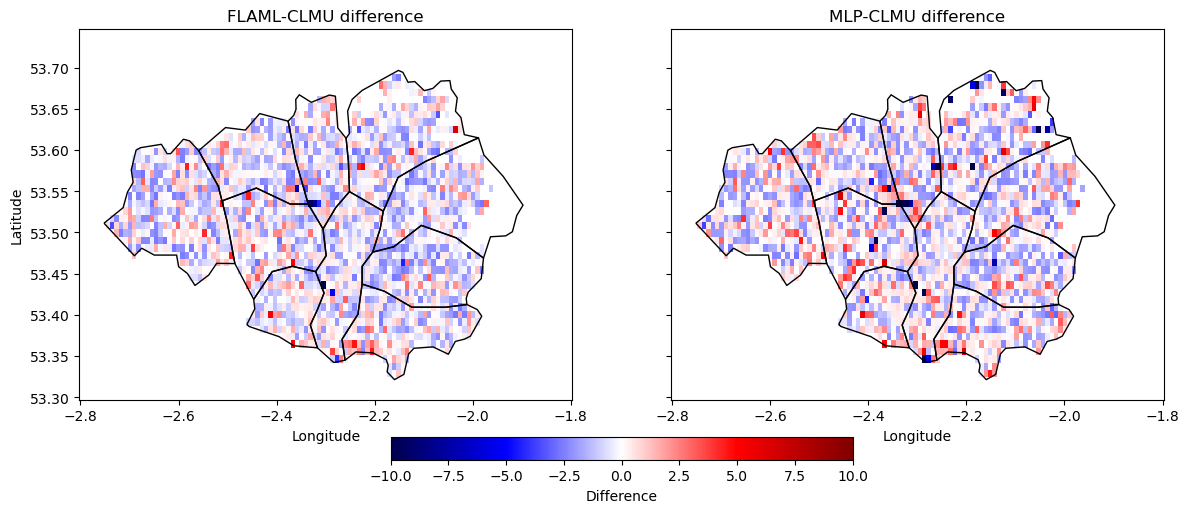

In [ ]:
from matplotlib.colors import TwoSlopeNorm
# 计算 difference
y_pred_grid_klaml_filtered_difference_1 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_klaml_filtered_1 - filtered_data_1, manchester_polygon
)
y_pred_grid_mlp_filtered_difference_1 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_mlp_filtered_1 - filtered_data_1, manchester_polygon
)

y_pred_grid_klaml_filtered_difference_2 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_klaml_filtered_2 - filtered_data_2, manchester_polygon
)
y_pred_grid_mlp_filtered_difference_2 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_mlp_filtered_2 - filtered_data_2, manchester_polygon
)

y_pred_grid_klaml_filtered_difference_3 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_klaml_filtered_3 - filtered_data_3, manchester_polygon
)
y_pred_grid_mlp_filtered_difference_3 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_mlp_filtered_3 - filtered_data_3, manchester_polygon
)

y_pred_grid_klaml_filtered_difference_4 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_klaml_filtered_4 - filtered_data_4, manchester_polygon
)
y_pred_grid_mlp_filtered_difference_4 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_mlp_filtered_4 - filtered_data_4, manchester_polygon
)

y_pred_grid_klaml_filtered_difference_5 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_klaml_filtered_5 - filtered_data_5, manchester_polygon
)
y_pred_grid_mlp_filtered_difference_5 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_mlp_filtered_5 - filtered_data_5, manchester_polygon
)

y_pred_grid_klaml_filtered_difference_6 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_klaml_filtered_6 - filtered_data_6, manchester_polygon
)
y_pred_grid_mlp_filtered_difference_6 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_mlp_filtered_6 - filtered_data_6, manchester_polygon
)


# 
norm = TwoSlopeNorm(vmin=-10, vcenter=0, vmax=10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

target_flaml = y_pred_grid_klaml_filtered_difference_3 #$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
target_mlp = y_pred_grid_mlp_filtered_difference_3 #$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

# klaml difference
im1 = ax1.pcolormesh(
    lon_grid, lat_grid, target_flaml,
    shading='auto', cmap='seismic', norm=norm
)
ax1.set_title('FLAML-CLMU difference')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
gdf_combined.boundary.plot(ax=ax1, edgecolor='black', linewidth=1)

# mlp difference
im2 = ax2.pcolormesh(
    lon_grid, lat_grid, target_mlp,
    shading='auto', cmap='seismic', norm=norm
)
ax2.set_title('MLP-CLMU difference')
ax2.set_xlabel('Longitude')
gdf_combined.boundary.plot(ax=ax2, edgecolor='black', linewidth=1)

# 
cbar = fig.colorbar(im1, ax=[ax1, ax2], orientation='horizontal', fraction=0.05, pad=0.08)
cbar.set_label('Difference')

# plt.tight_layout(rect=[0, 0.05, 1, 1])  # 
plt.show()

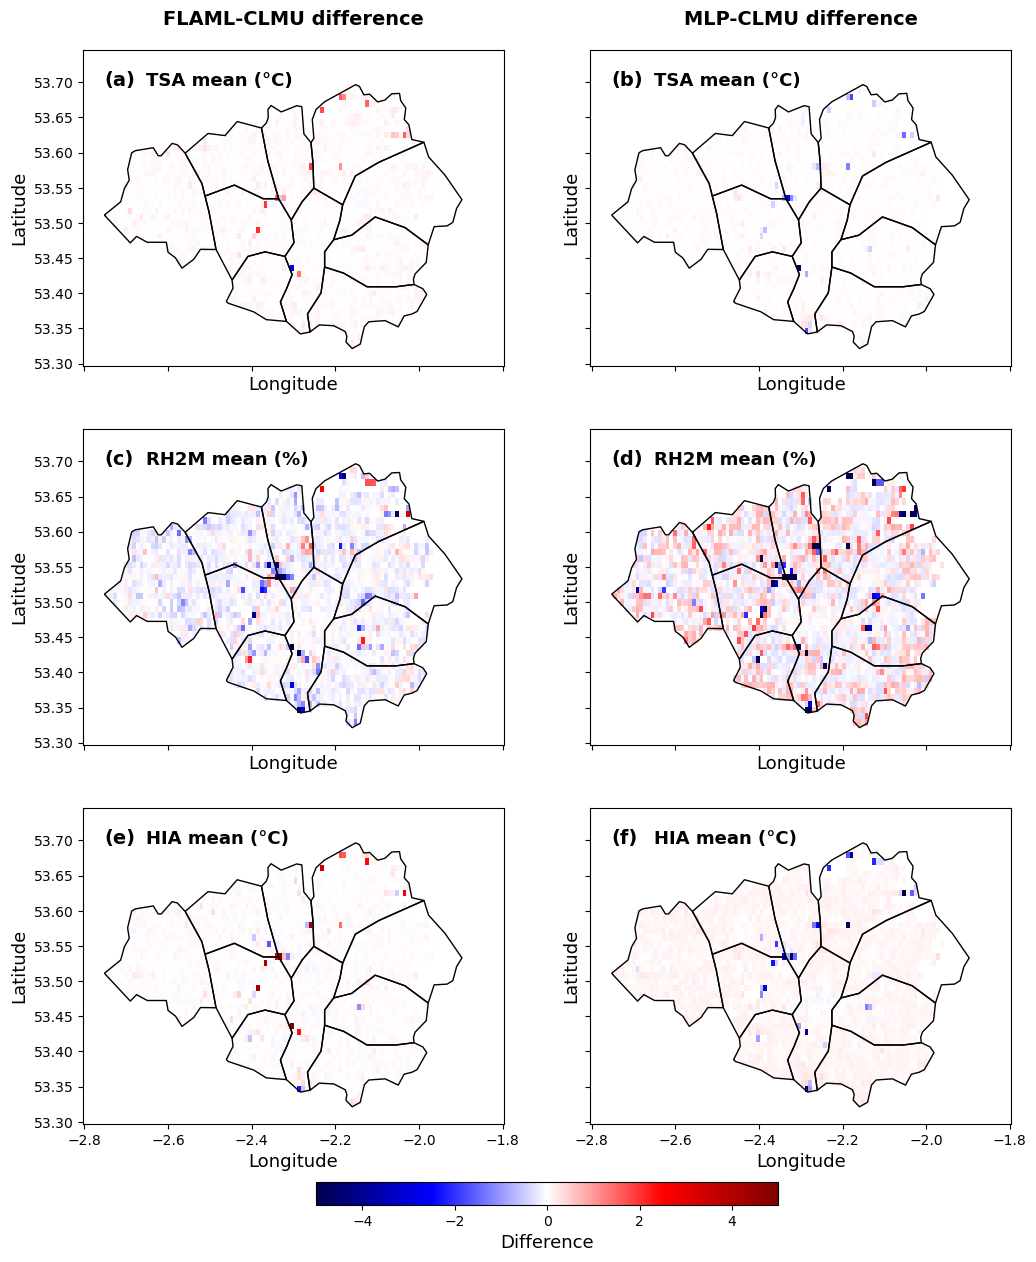

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# 指定参数和对应索引
param_names = ['TSA mean', 'RH2M mean', 'HIA mean']
indices = [2, 4, 6]

norm = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15), sharex=True, sharey=True)

# 
def add_unit_title(param):
    if 'RH2M' in param:
        return f"{param} (%)"
    else:
        return f"{param} (°C)"
    
for i, idx in enumerate(indices):
    target_flaml = eval(f'y_pred_grid_klaml_filtered_difference_{idx}')
    target_mlp = eval(f'y_pred_grid_mlp_filtered_difference_{idx}')

    # FLAML mapping
    im1 = axes[i, 0].pcolormesh(
        lon_grid, lat_grid, target_flaml,
        shading='auto', cmap='seismic', norm=norm
    )
    if i == 0:
        axes[i, 0].set_title('FLAML-CLMU difference', fontsize=14, pad=18,fontweight='bold')
    axes[i, 0].set_xlabel('Longitude',fontsize=13)
    axes[i, 0].set_ylabel('Latitude',fontsize=13)
    axes[i, 0].text(0.15, 0.93, add_unit_title(param_names[i]), transform=axes[i, 0].transAxes,
                    fontsize=13, fontweight='bold', va='top', ha='left', color='k')
    gdf_combined.boundary.plot(ax=axes[i, 0], edgecolor='black', linewidth=1)

for i, idx in enumerate(indices):
    # 1. data
    target_flaml = eval(f'y_pred_grid_klaml_filtered_difference_{idx}')
    target_mlp = eval(f'y_pred_grid_mlp_filtered_difference_{idx}')

    # 2. FLAML mapping
    im1 = axes[i, 0].pcolormesh(
        lon_grid, lat_grid, target_flaml,
        shading='auto', cmap='seismic', norm=norm
    )
    
    # MLP mapping
    im2 = axes[i, 1].pcolormesh(
        lon_grid, lat_grid, target_mlp,
        shading='auto', cmap='seismic', norm=norm
    )
    if i == 0:
        axes[i, 1].set_title('MLP-CLMU difference', fontsize=14, pad=18,fontweight='bold')
    axes[i, 1].set_xlabel('Longitude',fontsize=13)
    axes[i, 1].set_ylabel('Latitude',fontsize=13)
    axes[i, 1].text(0.15, 0.93, add_unit_title(param_names[i]), transform=axes[i, 1].transAxes,
                    fontsize=13, fontweight='bold', va='top', ha='left', color='k')
    gdf_combined.boundary.plot(ax=axes[i, 1], edgecolor='black', linewidth=1)

# 
import string
panel_labels = list(string.ascii_lowercase)[:6]
for row in range(3):
    for col in range(2):
        label_idx = row * 2 + col
        axes[row, col].text(
            0.05, 0.935, f'({panel_labels[label_idx]})',
            transform=axes[row, col].transAxes,
            fontsize=14, fontweight='bold',
            va='top', ha='left'
        )

# colorbar
cbar = fig.colorbar(im1, ax=axes, orientation='horizontal',
                    fraction=0.02, pad=0.05)
cbar.set_label('Difference',fontsize=13)

# plt.tight_layout(rect=[0, 0.05, 1, 1])  # 
plt.savefig('error_distribution_map.png', dpi=300, bbox_inches='tight')  # 
plt.show()

d:\python_Anaconda_install\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.9217118355942542

d:\python_Anaconda_install\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\python_Anaconda_install\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.8623634730526497

d:\python_Anaconda_install\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\python_Anaconda_install\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.5579105287562658

d:\python_Anaconda_install\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\python_Anaconda_install\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\python_Anaconda_install\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\python_Anaconda_install\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, 

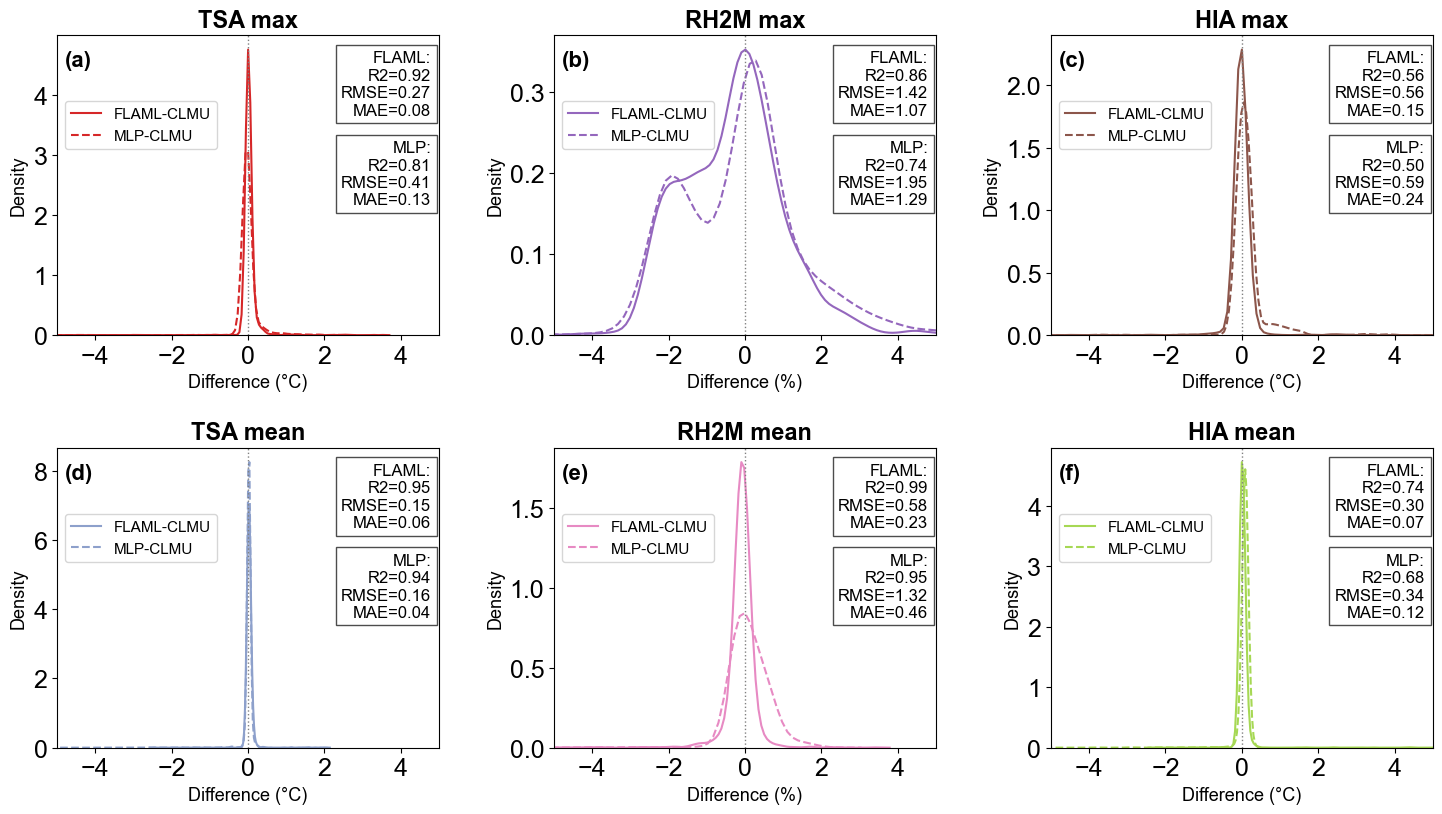

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import string

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.title_fontsize'] = 18

fig, axes = plt.subplots(2, 3, figsize=(15, 9))

params_max = ['TSA max', 'RH2M max', 'HIA max']
params_mean = ['TSA mean', 'RH2M mean', 'HIA mean']

colors_max = sns.color_palette('tab10', n_colors=10)
colors_mean = sns.color_palette('Set2', n_colors=10)

def add_unit_title(param):
    return param

def unit_for_param(param):
    return '(%)' if 'RH2M' in param else '(°C)'

def format_metrics(r2, rmse, mae):
    return f"R2={r2:.2f}\nRMSE={rmse:.2f}\nMAE={mae:.2f}"

# First row: max parameters
for i, param in enumerate(params_max):
    idx = 2 * i + 1

    y_true = eval(f'CLMU_man_tvariable_{idx}').ravel()
    y_flaml = eval(f'y_pred_grid_klaml_filtered_{idx}').ravel()
    y_mlp = eval(f'y_pred_grid_mlp_filtered_{idx}').ravel()

    diff_flaml = y_flaml - y_true
    diff_mlp = y_mlp - y_true

    mask = ~np.isnan(diff_flaml) & ~np.isnan(diff_mlp)
    diff_flaml = diff_flaml[mask]
    diff_mlp = diff_mlp[mask]

    sns.kdeplot(diff_flaml, ax=axes[0, i], color=colors_max[i + 3], label='FLAML-CLMU', linestyle='-')
    sns.kdeplot(diff_mlp, ax=axes[0, i], color=colors_max[i + 3], label='MLP-CLMU', linestyle='--')
    axes[0, i].axvline(0, color='gray', linestyle=':', lw=1)
    axes[0, i].set_title(add_unit_title(param), fontsize=17)
    axes[0, i].set_xlim([-5, 5])
    axes[0, i].set_xlabel(f'Difference {unit_for_param(param)}', fontsize=13)
    axes[0, i].set_ylabel('Density', fontsize=13)
    axes[0, i].legend(loc='center left', bbox_to_anchor=(0, 0.7), fontsize=11)

    mask_metrics = ~np.isnan(y_true) & ~np.isnan(y_flaml) & ~np.isnan(y_mlp)
    y_true_clean = y_true[mask_metrics]
    y_flaml_clean = y_flaml[mask_metrics]
    y_mlp_clean = y_mlp[mask_metrics]

    r2_f = r2_score(y_true_clean, y_flaml_clean)
    rmse_f = mean_squared_error(y_true_clean, y_flaml_clean, squared=False)
    mae_f = mean_absolute_error(y_true_clean, y_flaml_clean)

    r2_m = r2_score(y_true_clean, y_mlp_clean)
    rmse_m = mean_squared_error(y_true_clean, y_mlp_clean, squared=False)
    mae_m = mean_absolute_error(y_true_clean, y_mlp_clean)

    axes[0, i].text(0.98, 0.95, "FLAML:\n" + format_metrics(r2_f, rmse_f, mae_f),
                    transform=axes[0, i].transAxes, fontsize=12, ha='right', va='top',
                    bbox=dict(facecolor='white', alpha=0.7))
    axes[0, i].text(0.98, 0.65, "MLP:\n" + format_metrics(r2_m, rmse_m, mae_m),
                    transform=axes[0, i].transAxes, fontsize=12, ha='right', va='top',
                    bbox=dict(facecolor='white', alpha=0.7))

# Second row: mean parameters
for i, param in enumerate(params_mean):
    idx = 2 * i + 2

    y_true = eval(f'CLMU_man_tvariable_{idx}').ravel()
    y_flaml = eval(f'y_pred_grid_klaml_filtered_{idx}').ravel()
    y_mlp = eval(f'y_pred_grid_mlp_filtered_{idx}').ravel()

    diff_flaml = y_flaml - y_true
    diff_mlp = y_mlp - y_true

    mask = ~np.isnan(diff_flaml) & ~np.isnan(diff_mlp)
    diff_flaml = diff_flaml[mask]
    diff_mlp = diff_mlp[mask]

    sns.kdeplot(diff_flaml, ax=axes[1, i], color=colors_mean[i + 2], label='FLAML-CLMU', linestyle='-')
    sns.kdeplot(diff_mlp, ax=axes[1, i], color=colors_mean[i + 2], label='MLP-CLMU', linestyle='--')
    axes[1, i].axvline(0, color='gray', linestyle=':', lw=1)
    axes[1, i].set_title(add_unit_title(param), fontsize=17)
    axes[1, i].set_xlim([-5, 5])
    axes[1, i].set_xlabel(f'Difference {unit_for_param(param)}', fontsize=13)
    axes[1, i].set_ylabel('Density', fontsize=13)
    axes[1, i].legend(loc='center left', bbox_to_anchor=(0, 0.7), fontsize=11)

    mask_metrics = ~np.isnan(y_true) & ~np.isnan(y_flaml) & ~np.isnan(y_mlp)
    y_true_clean = y_true[mask_metrics]
    y_flaml_clean = y_flaml[mask_metrics]
    y_mlp_clean = y_mlp[mask_metrics]

    r2_f = r2_score(y_true_clean, y_flaml_clean)
    rmse_f = mean_squared_error(y_true_clean, y_flaml_clean, squared=False)
    mae_f = mean_absolute_error(y_true_clean, y_flaml_clean)

    r2_m = r2_score(y_true_clean, y_mlp_clean)
    rmse_m = mean_squared_error(y_true_clean, y_mlp_clean, squared=False)
    mae_m = mean_absolute_error(y_true_clean, y_mlp_clean)

    axes[1, i].text(0.98, 0.95, "FLAML:\n" + format_metrics(r2_f, rmse_f, mae_f),
                    transform=axes[1, i].transAxes, fontsize=12, ha='right', va='top',
                    bbox=dict(facecolor='white', alpha=0.7))
    axes[1, i].text(0.98, 0.65, "MLP:\n" + format_metrics(r2_m, rmse_m, mae_m),
                    transform=axes[1, i].transAxes, fontsize=12, ha='right', va='top',
                    bbox=dict(facecolor='white', alpha=0.7))

# Add subplot labels (a)-(f)
panel_labels = list(string.ascii_lowercase)[:6]
for row in range(2):
    for col in range(3):
        label_idx = row * 3 + col
        axes[row, col].text(0.02, 0.95, f'({panel_labels[label_idx]})',
                            transform=axes[row, col].transAxes,
                            fontsize=16, fontweight='bold', va='top', ha='left')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('error_distribution_kde_with_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

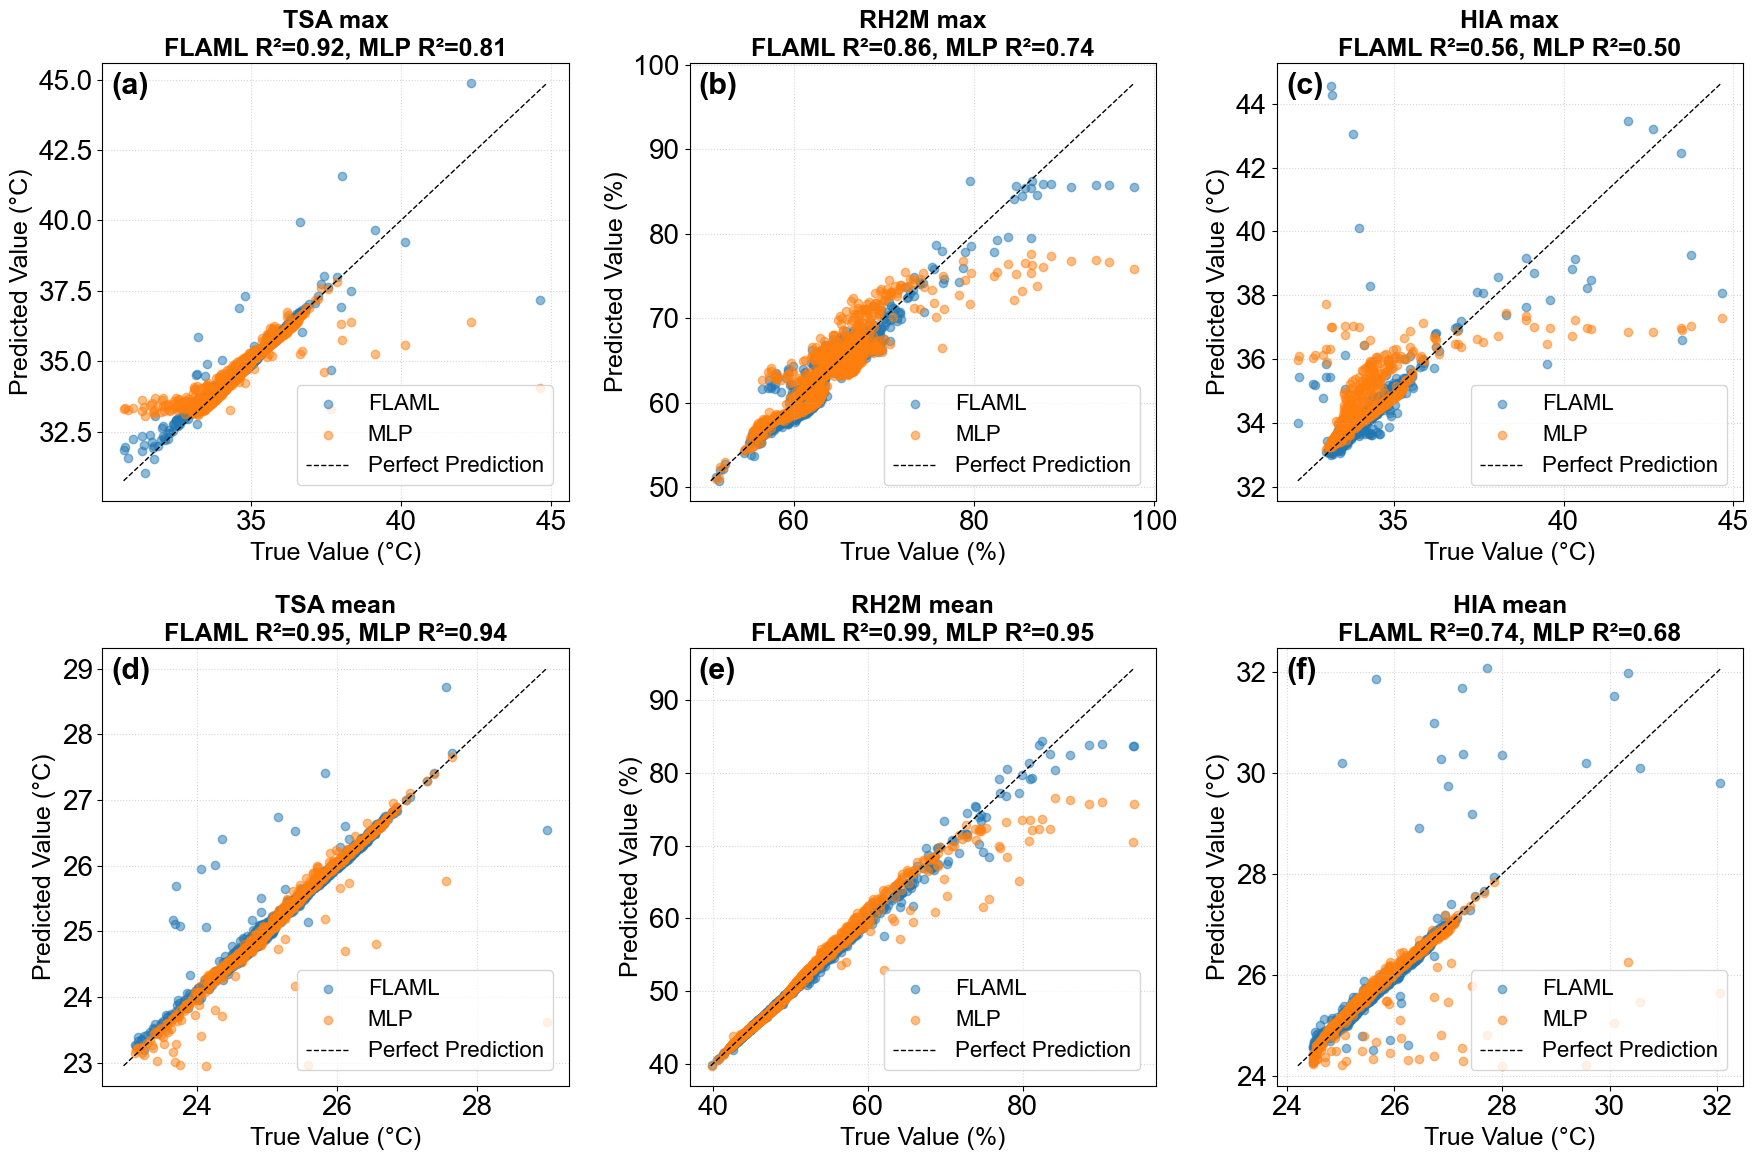

In [ ]:
from sklearn.metrics import r2_score
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set global font
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.titlesize'] = 18          # axis title size
plt.rcParams['axes.labelsize'] = 18          # axis label size
plt.rcParams['legend.fontsize'] = 16         # legend font size
plt.rcParams['xtick.labelsize'] = 20         # x tick label size
plt.rcParams['ytick.labelsize'] = 20         # y tick label size
plt.rcParams['legend.title_fontsize'] = 20   # legend title font size

# Create figure (2 rows x 3 columns, consistent with the KDE figure)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Parameters
params_max = ['TSA max', 'RH2M max', 'HIA max']
params_mean = ['TSA mean', 'RH2M mean', 'HIA mean']

# Color settings
colors = sns.color_palette('tab10', n_colors=2)  # use different colors for FLAML and MLP

def add_unit_title(param):
    return param

def unit_for_param(param):
    return '(%)' if 'RH2M' in param else '(°C)'

# First row: max parameters
for i, param in enumerate(params_max):
    idx = 2 * i + 1

    # Get data (variable names must match those used in the KDE code)
    y_true = eval(f'CLMU_man_tvariable_{idx}').ravel()
    y_flaml = eval(f'y_pred_grid_klaml_filtered_{idx}').ravel()
    y_mlp = eval(f'y_pred_grid_mlp_filtered_{idx}').ravel()

    # If TSA, convert from Kelvin to Celsius
    if 'TSA' in param:
        y_true = y_true - 273.15
        y_flaml = y_flaml - 273.15
        y_mlp = y_mlp - 273.15

    # Remove NaNs
    mask = ~np.isnan(y_true) & ~np.isnan(y_flaml) & ~np.isnan(y_mlp)
    y_true_clean = y_true[mask]
    y_flaml_clean = y_flaml[mask]
    y_mlp_clean = y_mlp[mask]

    # Scatter plots
    axes[0, i].scatter(y_true_clean, y_flaml_clean, color=colors[0], alpha=0.5, label='FLAML')
    axes[0, i].scatter(y_true_clean, y_mlp_clean, color=colors[1], alpha=0.5, label='MLP')

    # Add diagonal (perfect prediction) line
    min_val = min(y_true_clean.min(), y_flaml_clean.min(), y_mlp_clean.min())
    max_val = max(y_true_clean.max(), y_flaml_clean.max(), y_mlp_clean.max())
    axes[0, i].plot([min_val, max_val], [min_val, max_val], 'k--', lw=1, label='Perfect Prediction')

    # Compute R²
    r2_f = r2_score(y_true_clean, y_flaml_clean)
    r2_m = r2_score(y_true_clean, y_mlp_clean)

    # Titles and labels
    axes[0, i].set_title(f'{add_unit_title(param)}\nFLAML R²={r2_f:.2f}, MLP R²={r2_m:.2f}')
    axes[0, i].set_xlabel(f'True Value {unit_for_param(param)}')
    axes[0, i].set_ylabel(f'Predicted Value {unit_for_param(param)}')
    axes[0, i].legend(loc='lower right', bbox_to_anchor=(0.99, 0.01), fontsize=16)
    axes[0, i].grid(True, linestyle=':', alpha=0.5)

# Second row: mean parameters
for i, param in enumerate(params_mean):
    idx = 2 * i + 2

    # Get data
    y_true = eval(f'CLMU_man_tvariable_{idx}').ravel()
    y_flaml = eval(f'y_pred_grid_klaml_filtered_{idx}').ravel()
    y_mlp = eval(f'y_pred_grid_mlp_filtered_{idx}').ravel()

    # If TSA, convert from Kelvin to Celsius
    if 'TSA' in param:
        y_true = y_true - 273.15
        y_flaml = y_flaml - 273.15
        y_mlp = y_mlp - 273.15

    # Remove NaNs
    mask = ~np.isnan(y_true) & ~np.isnan(y_flaml) & ~np.isnan(y_mlp)
    y_true_clean = y_true[mask]
    y_flaml_clean = y_flaml[mask]
    y_mlp_clean = y_mlp[mask]

    # Scatter plots
    axes[1, i].scatter(y_true_clean, y_flaml_clean, color=colors[0], alpha=0.5, label='FLAML')
    axes[1, i].scatter(y_true_clean, y_mlp_clean, color=colors[1], alpha=0.5, label='MLP')

    # Add diagonal line
    min_val = min(y_true_clean.min(), y_flaml_clean.min(), y_mlp_clean.min())
    max_val = max(y_true_clean.max(), y_flaml_clean.max(), y_mlp_clean.max())
    axes[1, i].plot([min_val, max_val], [min_val, max_val], 'k--', lw=1, label='Perfect Prediction')

    # Compute R²
    r2_f = r2_score(y_true_clean, y_flaml_clean)
    r2_m = r2_score(y_true_clean, y_mlp_clean)

    # Titles and labels
    axes[1, i].set_title(f'{add_unit_title(param)}\nFLAML R²={r2_f:.2f}, MLP R²={r2_m:.2f}')
    axes[1, i].set_xlabel(f'True Value {unit_for_param(param)}')
    axes[1, i].set_ylabel(f'Predicted Value {unit_for_param(param)}')
    axes[1, i].legend(loc='lower right', bbox_to_anchor=(0.99, 0.01), fontsize=16)
    axes[1, i].grid(True, linestyle=':', alpha=0.5)

# Add subplot labels (a)-(f)
panel_labels = list(string.ascii_lowercase)[:6]
for row in range(2):
    for col in range(3):
        label_idx = row * 3 + col
        axes[row, col].text(0.02, 0.98, f'({panel_labels[label_idx]})',
                            transform=axes[row, col].transAxes,
                            fontsize=22, fontweight='bold', va='top', ha='left')

plt.tight_layout()
plt.savefig('true_vs_predicted_scatter.png', dpi=300, bbox_inches='tight')
plt.show()